In [12]:
import numpy as np
import pandas as pd
import math
from scipy.stats import chi2_contingency
import os
import seaborn as sns #for plotting

import matplotlib.pyplot as plt
%matplotlib inline



In [13]:
os.getcwd()
df=pd.read_excel("Absent.xls")

In [14]:
df.shape
df.head()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [15]:
miss = pd.DataFrame(df.isnull().sum())  
miss
miss=miss.reset_index() #old index added as column 
miss=miss.rename(columns={"index":"variables",0:"miss_values"})

In [369]:
miss

,variables,miss_values
0,ID,0
1,Reason for absence,0
2,Month of absence,0
3,Day of the week,0
4,Seasons,0
5,Transportation expense,0
6,Distance from Residence to Work,0
7,Service time,0
8,Age,0
9,Work load Average/day,0


In [16]:
miss['percentage']=(miss['miss_values'] / len(df))*100

In [17]:
miss=miss.sort_values("miss_values",ascending=False).reset_index(drop=True)



In [8]:
#miss.to_csv("missing.csv",index=False)
df=df.fillna(df.median())

df.iloc[:,19]=np.ceil(df.iloc[:,17]/(df.iloc[:,18]/100)**2)

In [18]:
corr=df.corr()
summary(corr)

NameError: name 'summary' is not defined

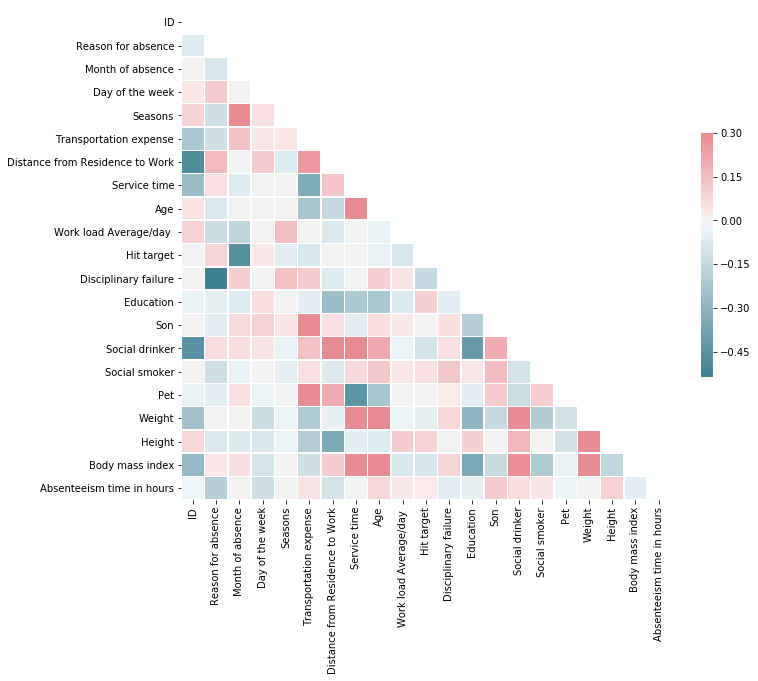

In [10]:
f, ax= plt.subplots(figsize=(11,9))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [357]:
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions


In [65]:
train.set_index('Month of absence')
test.set_index('Month of absence')
df.columns.tolist()

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

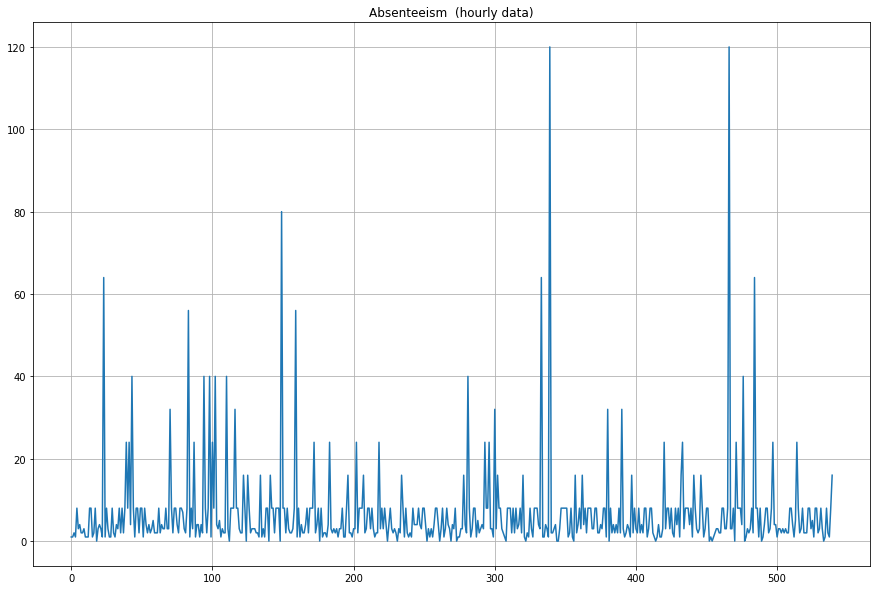

In [429]:
plt.figure(figsize=(15, 10))
plt.plot(train["Absenteeism time in hours"])
plt.title('Absenteeism  (hourly data)')
plt.grid(True)
plt.show()


In [94]:
df=df.sort_values("Month of absence",ascending=True).reset_index(drop=True)


In [60]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(test))


In [97]:
df['Month of absence'][739]=12
df['Month of absence']=df['Month of absence'].apply(int)


C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [265]:
        ki


NameError: name 'ki' is not defined

In [19]:
df1=df.loc[df['Month of absence'] == 1]
df2=df.loc[df['Month of absence'] == 2]
df3=df.loc[df['Month of absence'] == 3]
df4=df.loc[df['Month of absence'] == 4]
df5=df.loc[df['Month of absence'] == 5]
df6=df.loc[df['Month of absence'] == 6]
df7=df.loc[df['Month of absence'] == 7]
df8=df.loc[df['Month of absence'] == 8]
df9=df.loc[df['Month of absence'] == 9]
df10=df.loc[df['Month of absence'] == 10]
df11=df.loc[df['Month of absence'] == 11]
df12=df.loc[df['Month of absence'] == 12]



In [20]:
len(df12)
new=df[0:1]
for i in range(0,49):
    j=i
    new=pd.concat([new,df1[j:j+1]])
    new=pd.concat([new,df2[j:j+1]])
    new=pd.concat([new,df3[j:j+1]])
    new=pd.concat([new,df4[j:j+1]])
    new=pd.concat([new,df5[j:j+1]])
    new=pd.concat([new,df6[j:j+1]])
    new=pd.concat([new,df7[j:j+1]])
    new=pd.concat([new,df8[j:j+1]])
    new=pd.concat([new,df9[j:j+1]])
    new=pd.concat([new,df10[j:j+1]])
    new=pd.concat([new,df11[j:j+1]])
    new=pd.concat([new,df12[j:j+1]])



new=df


In [22]:
mod.to_csv('modi.csv', index=False)




NameError: name 'mod' is not defined

In [422]:
mod=pd.read_csv("modi.csv")


In [23]:
new



,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
113,28,23.0,1.0,4,2,225.0,26.0,9.0,28.0,NaN,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,NaN,24.0,1.0
137,27,23.0,2.0,6,2,184.0,42.0,7.0,27.0,302585.0,...,0.0,1.0,NaN,0.0,0.0,0.0,58.0,167.0,21.0,1.0
155,19,28.0,3.0,3,2,291.0,50.0,12.0,32.0,343253.0,...,0.0,1.0,0.0,1.0,0.0,0.0,65.0,169.0,23.0,2.0
184,15,28.0,4.0,4,3,291.0,31.0,12.0,40.0,326452.0,...,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,1.0
204,11,13.0,5.0,4,3,289.0,36.0,13.0,33.0,378884.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
220,24,19.0,6.0,2,3,246.0,25.0,16.0,NaN,377550.0,...,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,NaN,8.0
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
19,33,23.0,8.0,4,1,248.0,25.0,14.0,47.0,205917.0,...,0.0,1.0,2.0,0.0,0.0,1.0,86.0,165.0,32.0,2.0
40,27,23.0,9.0,3,1,184.0,42.0,7.0,27.0,241476.0,...,0.0,1.0,0.0,0.0,0.0,0.0,58.0,167.0,21.0,2.0


In [413]:
mod= mod.drop(mod[mod.index==0].index)


In [415]:
mod=mod.drop('index', axis=1)

In [419]:
mod['Month of absence'] = mod['Month of absence'].astype(int)



In [24]:
mod=pd.read_csv("modi.csv")


In [25]:
train=mod[0:540]
test=mod[541:588]

In [26]:
from datetime import datetime
date_rng = pd.date_range(start='1/1/2010', end='1/1/2059', freq='M')


In [27]:

date_rng
ts_uni = pd.DataFrame(date_rng, columns=['date'])

In [28]:
ts_uni["hours"]=mod['Absenteeism time in hours']


In [29]:
ts_uni.to_csv("timeseries.csv")



In [30]:
ts_uni['datetime'] = pd.to_datetime(ts_uni['date'])

In [31]:
ts_uni = ts_uni.set_index('datetime')
ts_uni.drop(['date'], axis=1, inplace=True)


In [34]:
ts_uni['rolling_sum'] = ts_uni.rolling(3).sum()
ts_uni[0:2]=4.0


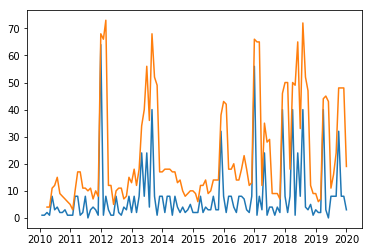

In [460]:
plt.plot(ts_uni[0:120])

C:\Users\pjthetracker\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


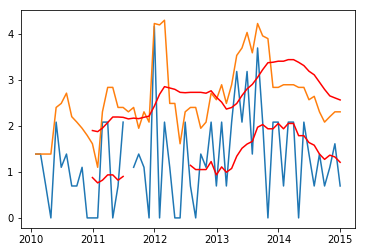

In [35]:
ts_log=np.log(ts_uni[0:60])
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


C:\Users\pjthetracker\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


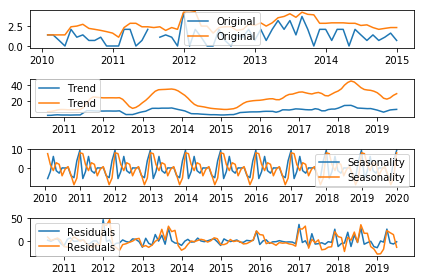

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_uni[0:120])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [467]:
ts_log[0:2]=1.386294

In [39]:
ts_mod=ts_uni[0:540]


In [40]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(ts_mod['hours'].values, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


C:\Users\pjthetracker\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\pjthetracker\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\pjthetracker\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be i

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  539
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2114.840
Method:                       css-mle   S.D. of innovations             12.226
Date:                Thu, 28 Feb 2019   AIC                           4243.679
Time:                        13:45:38   BIC                           4273.707
Sample:                             1   HQIC                          4255.424
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0074      0.140      0.053      0.958      -0.266       0.281
ar.L1.D.y     -0.8897      0.042    -21.150      0.000      -0.972      -0.807
ar.L2.D.y     -0.7305      0.055    -13.384      0.0

predicted=5.533218, expected=2.000000
predicted=4.399951, expected=3.000000
predicted=4.719545, expected=8.000000
predicted=4.773916, expected=3.000000
predicted=5.497664, expected=0.000000
predicted=4.362207, expected=1.000000
predicted=3.072179, expected=8.000000
predicted=3.572360, expected=2.000000
predicted=3.858724, expected=1.000000
predicted=2.506977, expected=8.000000
predicted=3.104869, expected=16.000000
predicted=5.120632, expected=2.000000
predicted=6.271283, expected=2.000000
predicted=5.229610, expected=0.000000
predicted=5.340607, expected=2.000000
predicted=5.224524, expected=1.000000
predicted=4.581745, expected=0.000000
predicted=1.200551, expected=2.000000
predicted=1.189265, expected=4.000000
predicted=1.271757, expected=2.000000
predicted=1.748084, expected=1.000000
predicted=1.652700, expected=8.000000
predicted=2.478150, expected=2.000000
predicted=3.120623, expected=3.000000
predicted=3.269297, expected=2.000000
predicted=3.197733, expected=0.000000
predicted=2

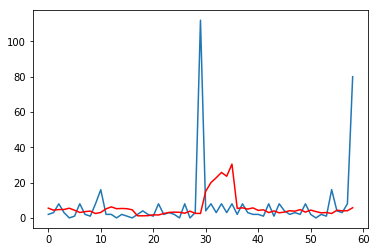

In [41]:
X = ts_uni['hours'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()    


Test MSE: 343.731


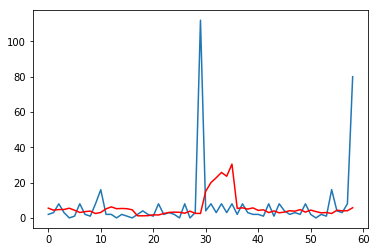

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [43]:
from sklearn.metrics import mean_squared_error
#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

obs=list()
obs = test['hours'].values
obs=obs.astype(float)

In [ ]:
error

In [535]:
test

,hours,rolling_sum
datetime,,
2055-02-28,2.0,20.0
2055-03-31,0.0,4.0
2055-04-30,2.0,4.0
2055-05-31,1.0,3.0
2055-06-30,0.0,3.0
2055-07-31,2.0,3.0
2055-08-31,4.0,6.0
2055-09-30,2.0,8.0
2055-10-31,1.0,7.0
